<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [38]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [39]:
# Load dataset
df = pd.read_csv("income.csv")
print(df.columns)
df.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


PyTorch Model Evaluation:
Accuracy: 0.0984
Precision: 0.5350
Recall: 0.0984
F1 Score: 0.0601
ROC AUC: 0.5190
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4298 - loss: 1.2543
Epoch 2/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5671 - loss: 0.9718
Epoch 3/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5721 - loss: 0.9496
Epoch 4/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5783 - loss: 0.9392
Epoch 5/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5786 - loss: 0.9365
Epoch 6/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5816 - loss: 0.9325
Epoch 7/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5812 - loss: 0.9281
Epoch 8/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5828 - loss: 0.9262
Epoch 9/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5835 - loss: 0.9225
Epoch 10/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5833 - loss: 0.9249
Epoch 11/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5842 - loss: 0.9238
Epoch 12/20
1222/1222 ━━━━━━━━━━━━━━━━━━━

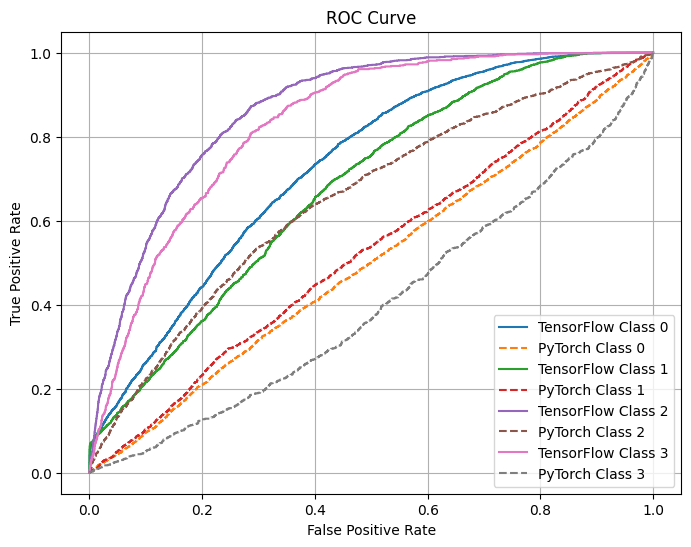

In [47]:
from tensorflow.keras.layers import Dense, Input

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split dataset
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Ensure target labels start from 0 and are contiguous
y = y - y.min()
num_classes = y.nunique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# PyTorch Model
class IncomeClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, num_classes)  # Adjust based on number of classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Raw logits for CrossEntropyLoss
        return x

# Model initialization
model = IncomeClassifier(X_train.shape[1], num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20  # Reduced epochs for efficiency
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluation
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_prob, axis=1)

# Convert tensors to numpy arrays
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()
y_pred_prob_np = torch.softmax(y_pred_prob, dim=1).numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np, average='weighted', zero_division=1)
recall = recall_score(y_test_np, y_pred_np, average='weighted')
f1 = f1_score(y_test_np, y_pred_np, average='weighted')
roc_auc = roc_auc_score(y_test_np, y_pred_prob_np, multi_class='ovr')

print("PyTorch Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# TensorFlow Model
model_tf = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model_tf.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])

# TensorFlow Evaluation
y_pred_prob_tf = model_tf.predict(X_test)
y_pred_tf = np.argmax(y_pred_prob_tf, axis=1)

accuracy_tf = accuracy_score(y_test_np, y_pred_tf)
precision_tf = precision_score(y_test_np, y_pred_tf, average='weighted', zero_division=1)
recall_tf = recall_score(y_test_np, y_pred_tf, average='weighted')
f1_tf = f1_score(y_test_np, y_pred_tf, average='weighted')
roc_auc_tf = roc_auc_score(y_test_np, y_pred_prob_tf, multi_class='ovr')

print("\nTensorFlow Model Evaluation:")
print(f"Accuracy: {accuracy_tf:.4f}")
print(f"Precision: {precision_tf:.4f}")
print(f"Recall: {recall_tf:.4f}")
print(f"F1 Score: {f1_tf:.4f}")
print(f"ROC AUC: {roc_auc_tf:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob_tf[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'TensorFlow Class {i}')
    fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob_np[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'PyTorch Class {i}', linestyle='dashed')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## Persamaan Matematis Model

### 1. Transformasi Input
Setiap fitur dalam dataset dinormalisasi menggunakan **Standar Skor (Z-score normalization)**:
\[
X' = \frac{X - \mu}{\sigma}
\]
di mana:
- \( X \) adalah nilai asli fitur,
- \( \mu \) adalah rata-rata fitur,
- \( \sigma \) adalah standar deviasi fitur.

### 2. Model Neural Network

Model terdiri dari tiga lapisan penuh (fully connected layers) dengan aktivasi **ReLU** di dua lapisan pertama dan **Softmax** di lapisan output.

#### **a. PyTorch Model**
Untuk setiap lapisan:
\[
Z^{(l)} = W^{(l)} X^{(l-1)} + b^{(l)}
\]
\[
A^{(l)} = \text{ReLU}(Z^{(l)}) \quad \text{untuk hidden layers}
\]
\[
A^{(\text{output})} = \text{Softmax}(Z^{(\text{output})})
\]
Lapisan dalam PyTorch:
- **Layer 1:** \( A^{(1)} = \text{ReLU}(W^{(1)} X + b^{(1)}) \)
- **Layer 2:** \( A^{(2)} = \text{ReLU}(W^{(2)} A^{(1)} + b^{(2)}) \)
- **Output:** \( A^{(\text{output})} = \text{Softmax}(W^{(\text{output})} A^{(2)} + b^{(\text{output})}) \)

#### **b. TensorFlow Model**
Model memiliki struktur yang sama dengan PyTorch, dengan tiga lapisan:
- Hidden Layer 1: 16 neuron, aktivasi ReLU
- Hidden Layer 2: 8 neuron, aktivasi ReLU
- Output Layer: Softmax

Persamaannya:
\[
A^{(1)} = \text{ReLU}(W^{(1)} X + b^{(1)})
\]
\[
A^{(2)} = \text{ReLU}(W^{(2)} A^{(1)} + b^{(2)})
\]
\[
A^{(\text{output})} = \text{Softmax}(W^{(\text{output})} A^{(2)} + b^{(\text{output})})
\]

### 3. Fungsi Loss
Model menggunakan **Cross-Entropy Loss** untuk klasifikasi multi-kelas:
\[
\mathcal{L} = - \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
\]
di mana:
- \( N \) adalah jumlah sampel,
- \( C \) adalah jumlah kelas,
- \( y_{ij} \) adalah label sebenarnya (one-hot encoded),
- \( \hat{y}_{ij} \) adalah probabilitas prediksi dari model.

### 4. Optimasi dan Pembaruan Bobot
Model diperbarui menggunakan **Adam Optimizer**, yang menggunakan momentum untuk mempercepat konvergensi:
\[
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
\]
\[
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
\]
\[
\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{v_t} + \epsilon} m_t
\]
di mana:
- \( g_t \) adalah gradien loss terhadap bobot,
- \( m_t \) dan \( v_t \) adalah rata-rata momentum dan varians gradien,
- \( \alpha \) adalah learning rate,
- \( \beta_1, \beta_2 \) adalah parameter eksponensial (default: \( 0.9, 0.999 \)).

### 5. Evaluasi Model
Evaluasi menggunakan metrik:
- **Akurasi:** \( \frac{\text{Jumlah prediksi benar}}{\text{Total data}} \)
- **Presisi:** \( \frac{\text{TP}}{\text{TP} + \text{FP}} \)
- **Recall:** \( \frac{\text{TP}}{\text{TP} + \text{FN}} \)
- **F1-score:** \( \frac{2 \times \text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}} \)
- **ROC-AUC:** Menggunakan kurva ROC untuk menilai performa model pada klasifikasi multi-kelas.

